# Project Description
In this notebook I will go over some of the basics of a fully connect feed forward neural network. I will mainly focus on their applications, how neural networks are formed, trained, and the math. To demonstrate this I will create my own neural network from scratch using `numpy` (a python library). 

First lets go over what data we are going to be using and what exactly we are trying to do. In this notebook I will use the use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) as an example. In this dataset we are given five columns `sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)` and `class`. The first four are all size measurements of a flowers sepal and petal. The `class` (label) column is used to represent if a flower is one of these three flowers `Iris-versicolor, Iris-setosa, Iris-virginica`. So now what we will attempt to do is classify each of these flowers given these measurements.

Now that we know what this notebook is going go over I have to mention some things that will be helpful to know before reading. This notebook goes into the math of neural networks. Some math knowledge of matrix multiplication and multivariable calculus will be useful. We will be doing all the math with numpy so python is important as well. 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# The Data

In [2]:
data_folder = 'data'
X_train = pd.read_csv(f'./{data_folder}/X_train.csv')
y_train = pd.read_csv(f'./{data_folder}/y_train.csv')
X_test = pd.read_csv(f'./{data_folder}/X_test.csv')
y_test = pd.read_csv(f'./{data_folder}/y_test.csv')
train_data = pd.concat([X_train, pd.get_dummies(y_train['class'])], axis=1)
test_data = pd.concat([X_test, pd.get_dummies(y_test['class'])], axis=1)

Taking a look at our data we can see that there are multiple variables. As I mentioned these variables are all size measurements of a flowers sepal and petal in cm.

In [3]:
train_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-setosa,Iris-versicolor,Iris-virginica
0,5.5,2.4,3.7,1.0,0,1,0
1,4.8,3.0,1.4,0.1,1,0,0
2,5.5,2.6,4.4,1.2,0,1,0
3,5.0,3.2,1.2,0.2,1,0,0
4,6.9,3.1,5.1,2.3,0,0,1
...,...,...,...,...,...,...,...
107,6.3,2.7,4.9,1.8,0,0,1
108,7.2,3.0,5.8,1.6,0,0,1
109,5.8,4.0,1.2,0.2,1,0,0
110,5.2,3.4,1.4,0.2,1,0,0


Neural networks are very powerful tools that can help us solve problems with data that is non linear. For example if we have some data that is linear seperable we can easily draw a line to seperate and classify whatever it is we are trying to classify. But if we have some non linear data we can't do that. This is where neural networks come in. 
To further drive the point that simple logistic regression will not work we will graph the data to see what it looks like. 

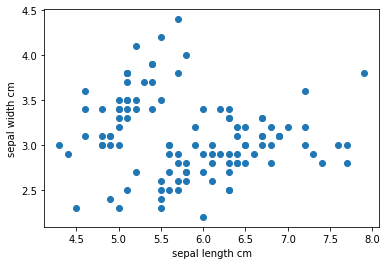

In [4]:
# TODO: graph with color
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'])
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
# plt.legend(loc="lower right")
plt.show()

Now that we have taken a look at our data we can get into creating a neural network.

# Neural Network Anatomy
A neural network is formed by an input layer, some number of hidden layers, and an ouput layer. All of these layers contain some number of neurons. The input layer has as many neurons as it does inputs. For example in our network our input layer will have four neurons for `sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)`. Simiarly our output layer has as many neurons as it does classes. For example we have the three classes `Iris-versicolor, Iris-setosa, Iris-virginica` so we will have three output neurons. As I mentioned we can have as many hidden layers as we want. Within the hidden layers we can have as many neurons as we choose as well. To demonstrate what a nerual network looks like below is an image of the neural network that is made later in this notebook.

The lines connecting the input layer to the first hidden layers are called weights same for the first hidden layer to the second hidden layers. These weights are what we will later be adjusting using back propogation.

The idea of the nueral network is that we have some inputs and we want to pass them forward to through the network (from the input to hidden layers and to the output). The

# The Math (Feeding Forward)
To feed forward an input from the input layer to the first hidden layer we will multiply all inputs $\vec{x}$ by all the weights connecting the input layer to h1 $W_1$ and add some bias $b_1$. Doing all that will give us $h_1$. We then apply some non linearity function to that and that will be our activations. In this case we are using relu. This looks like this: 
$$ \vec{z_1} = relu(\vec{h_1})$$
$$ \vec{h_1} = W_1 * \vec{x} + \vec{b_1} $$
$$ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$$

Now we just continue this unitl we get to the output layer. So to keep forwarding this input we would now do this: 

$$ \vec{z_2} = \vec{h_2}$$
$$ \vec{h_2} = W_2 * \vec{z_1} + \vec{b_2} $$
$$ \vec{z_2} = W_2 * \vec{z_1} + \vec{b_2}$$

And lastly our ouput will simply just be:
$$ \hat{y} = softmax(\vec{z_2}) $$ 

# Back Propogation
As I mentioned neural networks contain weights and biases. We can manually adjust them or set them to random variables to see which values give us the best result. This of course is not a good proccess seeing how our network has so many weights and biases. What we want to do instead is learn the values to our weights and biases that will minimise our loss. We can do this with calculus. We can do this by taking the negative gradient of our cost function ($ C = (\hat{y}-y)^2$). The gradient gives the direction of fastest assent. So if we take the negative gradient we will approach a place in which our loss is as close to 0 as possible.  Below I will explain the math that allows us to learn the values for our weights and biases. This will involved mutlivariable calculus.

This is a basic example of what our network looks like. We have an input($X$), two hidden layers ($h_1,h_2$) and two weights ($W_1,W_2$). 
$$ X ---W_1---> h_1 ---W_2---> h_2$$

To calculate the error that our network produces we use the cost function $ C = (\hat{y} - y)^2 $
where $ \hat{y} $ is the output vector/activations and $ y $ is the label as a vector. An example of what these look like is $ \hat{y} = \begin{bmatrix}
0.8 \\
0.1 \\
0.1 
\end{bmatrix} $ and $ \hat{y} = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix} $

As I mentioned our output is $\hat{y}$ which is given by the follwing function $\hat{y} = softmax(h_2)$. The activations $h_2$ are passed trough the softmax function. 

$$ \hat{y} = softmax( W_2 * \vec{h_1} + \vec{b_2} ) $$

As we saw above to feed forward and input we use a series of functions. For example to get the first hidden layers activations we do this $ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$. What we want to do now is see how much each weight and bias is affecting our cost. In other words whats the derivative of the cost function $C$ with respect to $W_1$. 

In the example below we will take the derivative of our cost function with respect to the second weights ($W_2$).
$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$

$$ z^\hat{y} = W_2 * \vec{z_1} + \vec{b_2}  \hspace{10mm}  \frac{\partial z^\hat{y}}{\partial W_2} = \vec{z_1}$$

$$ \frac{\partial C}{\partial W_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial z^\hat{y}}{\partial W_2} = 2(\hat{y} - y) * \vec{h_1} $$

This will tell us by how much we should change the weights in $W_2$ Now we just continue this proccess until we reach the input layer. But first we need to calculate the error produced by the activations in the first hidden layer $\frac{\partial C}{\partial h_1}$.

$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$
$$ \hat{y} = h_2  \hspace{10mm} \frac{\partial \hat{y}}  {\partial h_2}$$
$$ h_2 = W_2 *z_1 + b_1 \hspace{10mm} \frac{\partial h_2}  {\partial z_1} = W_2$$
$$ z_1 = relu(h_1) \hspace{10mm} \frac{\partial z_1}  {\partial h_1} = relu`(h_1)$$



$$ \frac{\partial C}{\partial h_1} = \frac{\partial C}  {\partial \hat{y}} \frac{\partial \hat{y}}  {\partial h_2} \frac{\partial h_2}  {\partial z_1} \frac{\partial z_1}  {\partial h_1} = 2(\hat{y} - y) *  W_2 * relu`(h_1)$$

$$ 2(\hat{y} - y) *  W_2 * relu`(h_1) $$ This will tell us the error in the first hidden layer. Now we can continue our back propogation. Our next derivative to get is going to be $\frac{\partial h_1}{\partial W_1}$. This will tell use how to change the weights in $W_1$. Because we have calculated all of our chain rule deriatives all that is left is just now.

$$ h_1 = \vec{x}*W_1+b_1 \hspace{10mm} \frac{\partial h_1}  {\partial W_1} = \vec{x}$$

$$ \frac{\partial C}  {\partial h_1} \frac{\partial h_1}  {\partial W_1}  = \vec{x}\frac{\partial C}  {\partial h_1} $$



Now that we have talked about how a neural network feeds forward an input to get and output. And that we have went over how we can learn the values of the weights and biases of our neural network, it is time to build one. Below is the code to a neural network class which we will train to classify dataset. The network below has an input layer of four nerons for our for inputs, 2 hidden layers one of two neurons and one of 3 output neurons. I will go over how a neural network is trained below as well but as mentioned it involves the calculus that is explained above.

# Creating the Network
Below is the code for a neural network. As explained earlier our network will have a input layer, two hidden layers, and two weights. It has a function to feed forward an input and also to perform back propagation. Lastly it also has a function to train

In [5]:
class Network:
    def __init__(self):
        # layers/activations
        self.input = np.random.rand(4, 1)
        self.h1 = np.random.rand(2, 1)
        self.h2 = np.random.rand(3, 1)
        
        # weights 
        self.w_1 = np.random.rand(2, 4)
        self.w_2 = np.random.rand(3, 2)
        
        # biases 
        self.b_1 = np.random.rand(2, 1)
        self.b_2 = np.random.rand(3, 1)

    def relu(self,activations):
        return np.maximum(0, activations)

    def relu_deriv(self, activations):
        return activations > 0

    def softmax(self, activations):
        return np.exp(activations) / np.sum(np.exp(activations))
    
    def feed_forward(self, X):
        # input
        # reshapre the input into vector form.
        # Example [1, 0, 0] -> [[1], [1], [1]]
        self.input = np.reshape(X, (-1,1))
        
        # input -> h1
        # the activations in the first hidden layer are given by the dot product 
        # of the weights by the input plus some biass its all then passed into
        # our activation function. relu(W_1*x+b_1)
        h1_activations = self.relu(np.dot(self.w_1, self.input) + self.b_1)
        self.h1 = h1_activations

        # h1 -> h2
        # the activations in the seocnd hidden layer (h_2) are given by the dot product 
        # of the second weights (w_2) by the previous activations (h1) plus the bias(b_2).
        # W_2*h1+b_2
        h2_activations = (np.dot(self.w_2, h1_activations) + self.b_2)
        self.h2 = h2_activations 

        # h2 -> output 
        # our output activtions/predictions are given by the second layer activations (h_2)
        # put into the softmax function. 
        output = self.softmax(self.h2)
        
        return (output, max(output))
    
    def back_prop(self, output, y, learning_rate=0.01):
        y = np.reshape(y, (-1,1))
        
        output_error = (2 * (output - y))
        
        dw_2 = -learning_rate * output_error.dot(self.h1.T)
        b_2 = -learning_rate * output_error

        h1_error = self.w_2.T.dot(output_error) * self.relu_deriv(self.h1)
        dw_1 = -learning_rate * h1_error.dot(self.input.T)
        b_1 = -learning_rate * h1_error
        
        # update all the weights
        self.w_1 +=  dw_1
        self.w_2 +=  dw_2
        
        # update all the biases
        self.b_1 += b_1
        self.b_2 += b_2
        return 0
       
    def accuracy_and_cost(self, data):
        total_correct = 0
        cost = 0
        for index, row in data.iterrows():
            # Our input value is the first four colmuns in our dataset.
            # Since each row is turned into a list here we select the
            # first four elements in the list whihch will be our intput.
            X = row.tolist()[:4] 
            # Our output value is the last three colmuns in our dataset.
            # To select it we select the last three elemets in the list
            # that will be our output.
            y = row.tolist()[4:]
            output, predicted = self.feed_forward(X)
            # get the index of the label (ie index = 2 [0, 0, 1])
            label_index = y.index(max(y))
            # check if the index of the label is the same as our
            # index as the max value in our output vector
            predicted_index = np.where(output==predicted)[0][0]
            # if they are the same index increase the correct counter
            if label_index == predicted_index:
                total_correct += 1
            cost += (1-predicted)**2
        return total_correct/data.shape[0], cost
    
    def train(self, data, iterations):
        for i in range(iterations):
            for index, row in data.iterrows():
                # Our input value is the first four colmuns in our dataset.
                # Since each row is turned into a list here we select the
                # first four elements in the list whihch will be our intput.
                X = row.tolist()[:4] 
                # Our output value is the last three colmuns in our dataset.
                # To select it we select the last three elemets in the list
                # that will be our output.
                y = row.tolist()[4:]
                output, predicted = self.feed_forward(X)
                self.back_prop(output, y)
        cost, training_accuracy = self.accuracy_and_cost(data)
        return training_accuracy, cost
    
    def get_loss(self, X, y):
        output, predicted = self.feed_forward(X)
        return (1-predicted)

# Using the Network

In [6]:
iterations = [1, 5, 10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

In [7]:
def neural_network_info(iterations, train_data, test_data):
    """
    This function will return data to graph how our neural network
    changes as we increas the iterations. 
    """
    df = pd.DataFrame(columns=['iteration', 'training_cost', 'test_cost'])
    for i in iterations:
        # create a new network
        network = Network()
        # train our network (also return trainin accuracy)
        training_cost, training_accuracy = network.train(train_data, i)
        # returns test accuracy
        test_cost, test_accuracy = network.accuracy_and_cost(test_data)
        # add to df
        df.loc[i] = [i] + [training_cost] + [test_cost]
    return df

In [8]:
df = neural_network_info(iterations, train_data, test_data)

/Users/gael/git-repos/notebooks/back-propagation/env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [9]:
df

,iteration,training_cost,test_cost
1,1,[23.951257182124372],0.578947
5,5,[4.301418591385835],0.631579
10,10,[3.948168095758673],0.763158
50,50,[1.7482728254647806],0.921053
100,100,[0.7954001712006808],0.921053
500,500,[0.19801931958053334],0.947368
1000,1000,[0.21813801023669588],0.947368
1500,1500,[0.28731250876520137],0.947368
2000,2000,[0.39192679156973703],0.947368
2500,2500,[0.46485728474530874],0.947368


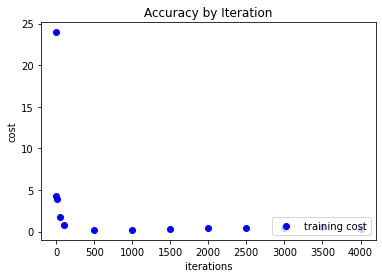

In [19]:
plt.scatter(df['iteration'], df['training_cost'], color='b', label='training cost')
# plt.scatter(df['iteration'], df['test_cost'], color='b', label='test cost')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend(loc="lower right")
plt.title("Accuracy by Iteration")
plt.show()

In [12]:
# nn = Network()

In [13]:
# training_accuracy = nn.train(data, 100)

In [14]:
# print(f'Training Accuracy: {training_accuracy}')

In [15]:
# print(f'Test Accuracy: {nn.get_accuracy(data)}')

# Explaning Further Topics of Neural Networks 
- > dropput
- > training methods

# Conclusion